In [1]:
#load libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

## Load and Visualize Data

In [2]:
from torchvision import datasets, transforms

transform = transforms.ToTensor()
batch_size = 64

dataset = datasets.ImageFolder('29561_37705_bundle_archive/img_align_celeba/', transform)

train_loader = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

In [3]:
dataiter = iter(train_loader)
images,_ = dataiter.next()

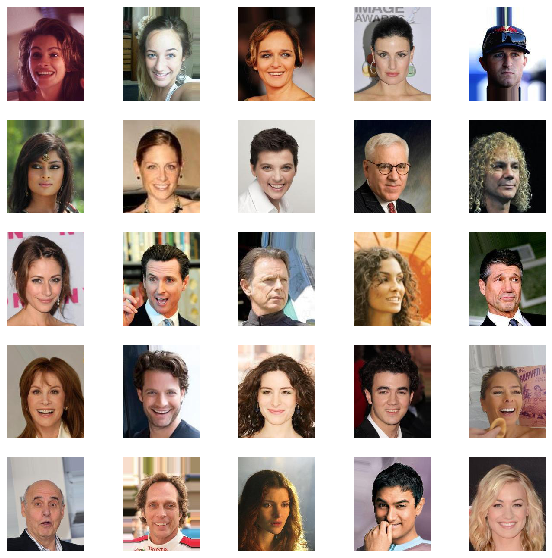

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(np.transpose(images[i], (1,2,0)))
plt.show()

## Detect and Extract Faces (using OpenCv)

Number of faces detected:  1


array([ 39,  73, 103, 103], dtype=int32)

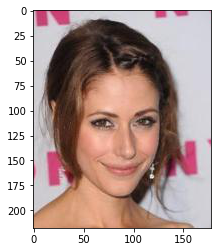

In [103]:
#extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

#load color(RGB) image
img = images[10]*255     #https://stackoverflow.com/questions/24974827/cascadeclassifier-in-opencv-generates-error               
img = img.type(torch.uint8)          

#convert RGB image to grayscale
gray = cv2.cvtColor((np.transpose(img,(1,2,0))).numpy(), cv2.COLOR_RGB2GRAY)

#find faces in image
faces = face_cascade.detectMultiScale(gray)

#print number of faces detected 
print('Number of faces detected: ',len(faces))

x1, y1, w, h = faces[0] 
x2, y2 = x1+w, y1+h

plt.imshow(np.transpose(img,(1,2,0)))

faces[0]

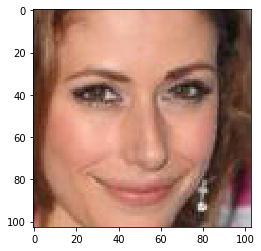

In [104]:
plt.imshow(np.transpose(img,(1,2,0))[y1:y2, x1:x2])